In [1]:
#Importing faces dataset
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=40)

faces.DESCR

".. _labeled_faces_in_the_wild_dataset:\n\nThe Labeled Faces in the Wild face recognition dataset\n------------------------------------------------------\n\nThis dataset is a collection of JPEG pictures of famous people collected\nover the internet, all details are available on the official website:\n\n    http://vis-www.cs.umass.edu/lfw/\n\nEach picture is centered on a single face. The typical task is called\nFace Verification: given a pair of two pictures, a binary classifier\nmust predict whether the two images are from the same person.\n\nAn alternative task, Face Recognition or Face Identification is:\ngiven the picture of the face of an unknown person, identify the name\nof the person by referring to a gallery of previously seen pictures of\nidentified persons.\n\nBoth Face Verification and Face Recognition are tasks that are typically\nperformed on the output of a model trained to perform Face Detection. The\nmost popular model for Face Detection is called Viola-Jones and is\ni

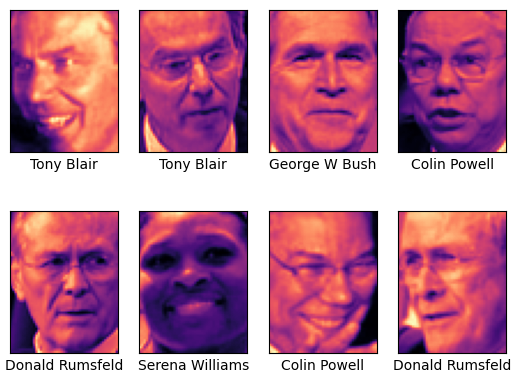

In [2]:
#Plotting faces dataset
import matplotlib.pyplot as plt

fig, splts = plt.subplots(2, 4)
for i, splts in enumerate(splts.flat):
    splts.imshow(faces.images[i], cmap='magma')
    splts.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [3]:
#Splitting to training (70%) and testing (30%) datasets
from sklearn.model_selection import train_test_split

X = faces.data
y = faces.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
#Creating the Model
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

##For dimensionality reduction
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)

##Building the model
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [5]:
#Fitting the model
model.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(class_weight='balanced'))])

In [6]:
#Testing the Model
from sklearn.metrics import accuracy_score

predictions = model.predict(X_test)

accuracy_score(predictions, y_test)

0.714795008912656

In [7]:
#Creating a classification report
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test, digits=2))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        20
           1       0.13      1.00      0.24         2
           2       0.95      0.50      0.66       147
           3       0.80      0.73      0.76        44
           4       0.82      0.82      0.82       158
           5       0.58      0.68      0.62        28
           6       0.60      1.00      0.75         9
           7       0.55      0.92      0.69        12
           8       0.31      0.80      0.44         5
           9       0.69      1.00      0.81        11
          10       0.45      0.83      0.59         6
          11       0.62      0.57      0.59        14
          12       0.58      1.00      0.74        14
          13       0.73      0.89      0.80         9
          14       0.38      1.00      0.56         5
          15       0.69      1.00      0.81        11
          16       0.44      1.00      0.61         7
          17       0.71    